<a href="https://colab.research.google.com/github/AniketKS30/Deep-Learning/blob/main/Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Import Libarary
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import missingno as msno
import sklearn
import plotly.express as px
from sklearn.model_selection import train_test_split



from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load Data Set
train = pd.read_csv('/content/drive/MyDrive/DataSet/Train.csv')

test = pd.read_csv('/content/drive/MyDrive/DataSet/Test.csv')
df = train.copy()


In [3]:
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
#To chack Shape Of data
df.shape

(8068, 11)

In [6]:
# To Know column Names
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
# Check number of missing values in the data set
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
df.fillna(method = 'ffill', inplace = True)

In [9]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A


In [10]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [11]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.618741,2.846678
std,2595.381232,16.711696,3.394284,1.530377
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [12]:
corr = df.corr()

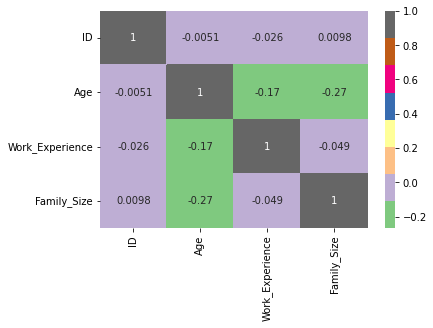

In [13]:
# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Accent",
        annot= True)

In [14]:
plot_df = df.groupby('Segmentation')['Segmentation'].agg(['count']).reset_index()
fig = px.pie(plot_df, values = plot_df['count'], names = plot_df['Segmentation'])
fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))
fig.update_layout(title_text = 'Customer<br>Segmentation', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)              
fig.show()

In [15]:
# Customer Type Based On Gender

gender_based = pd.pivot_table(df,values='ID',index=['Gender'],columns=['Segmentation'],aggfunc=np.count_nonzero)

In [16]:
gender_based

Segmentation,A,B,C,D
Gender,,,,
Female,909,861,922,959
Male,1063,997,1048,1309


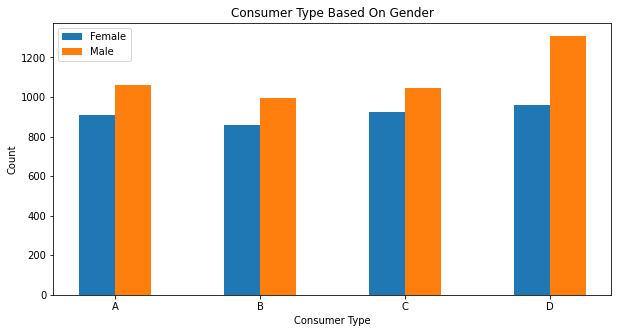

In [17]:
x = np.arange(len(gender_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(gender_based)):
    ax.bar(x+(i*width),gender_based.loc[gender_based.index[i]],width=width, label=gender_based.index[i])

ax.set_xticks(x+((len(gender_based)/2-0.5)*width))
ax.set_xticklabels(gender_based.columns)

plt.title('Consumer Type Based On Gender')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [18]:
# Customer Type Based On Ever Married or not

married_based = pd.pivot_table(df,values='ID',index=['Ever_Married'],columns=['Segmentation'],aggfunc=np.count_nonzero)

In [19]:
married_based

Segmentation,A,B,C,D
Ever_Married,,,,
No,814,489,405,1638
Yes,1158,1369,1565,630


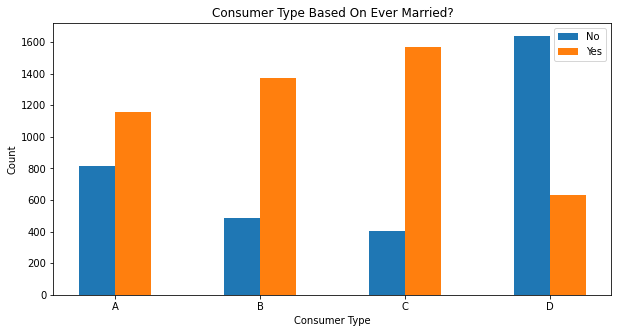

In [20]:
x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(married_based)):
    ax.bar(x+(i*width),married_based.loc[married_based.index[i]],width=width, label=married_based.index[i])

ax.set_xticks(x+((len(married_based)/2-0.5)*width))
ax.set_xticklabels(married_based.columns)

plt.title('Consumer Type Based On Ever Married?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [21]:
# Customer Type Based On Age

age_based = pd.DataFrame(df.groupby('Segmentation')['Age'].mean())
age_based

,Age
Segmentation,
A,44.924949
B,48.200215
C,49.144162
D,33.390212


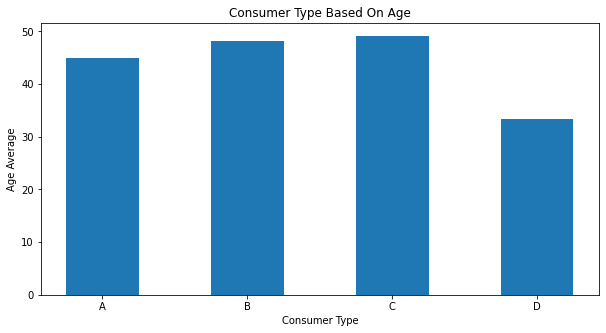

In [22]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['Age'],width=0.5)

plt.title('Consumer Type Based On Age')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Age Average')
plt.show()

In [23]:
# Customer Type Based On Have Been Graduated or not

grad_based = pd.pivot_table(df,values='ID',index=['Graduated'],columns=['Segmentation'],aggfunc=np.count_nonzero)
grad_based

Segmentation,A,B,C,D
Graduated,,,,
No,738,510,354,1445
Yes,1234,1348,1616,823


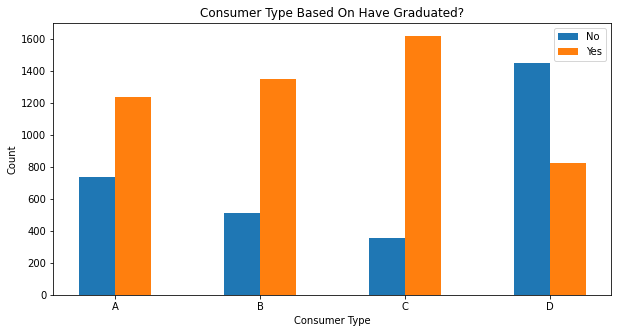

In [24]:
x = np.arange(len(grad_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(grad_based)):
    ax.bar(x+(i*width),grad_based.loc[grad_based.index[i]],width=width, label=grad_based.index[i])

ax.set_xticks(x+((len(grad_based)/2-0.5)*width))
ax.set_xticklabels(grad_based.columns)

plt.title('Consumer Type Based On Have Graduated?')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [25]:
# Customer Type Based On Profession

prof_based = pd.pivot_table(df,values='ID',index=['Profession'],columns=['Segmentation'],aggfunc=np.count_nonzero)
prof_based

Segmentation,A,B,C,D
Profession,,,,
Artist,564,766,1067,158
Doctor,205,144,142,212
Engineer,262,190,75,177
Entertainment,367,223,152,221
Executive,128,184,176,117
Healthcare,111,104,149,989
Homemaker,74,56,29,91
Lawyer,202,160,142,132
Marketing,59,31,38,171


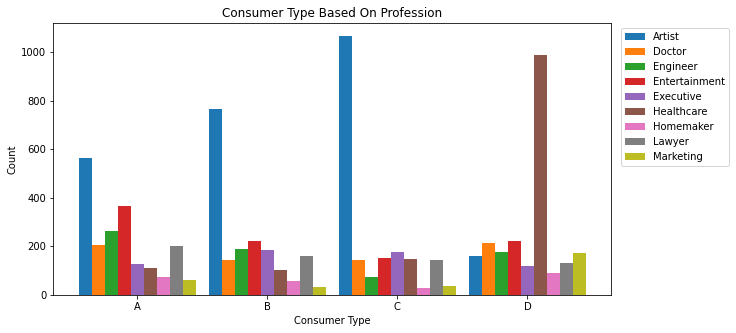

In [26]:
x = np.arange(len(prof_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(prof_based)):
    ax.bar(x+(i*width),prof_based.loc[prof_based.index[i]],width=width, label=prof_based.index[i])

ax.set_xticks(x+((len(prof_based)/2-0.5)*width))
ax.set_xticklabels(prof_based.columns)

plt.title('Consumer Type Based On Profession')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',bbox_to_anchor=(0.92,0.40,0.3,0.6),frameon=True)
plt.show()

In [27]:
# Customer Type Based On Work Experience

workexp_based = pd.DataFrame(df.groupby('Segmentation')['Work_Experience'].mean())
workexp_based

,Work_Experience
Segmentation,
A,2.806795
B,2.391819
C,2.247716
D,2.963404


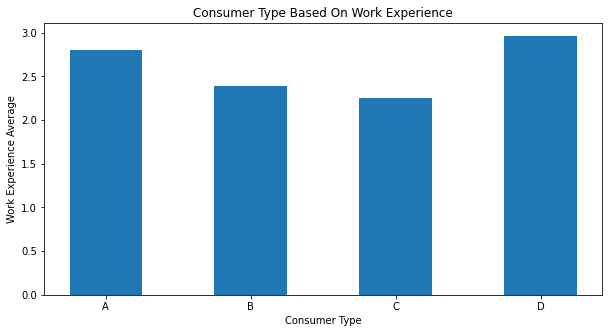

In [28]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(workexp_based.index,workexp_based['Work_Experience'],width=0.5)

plt.title('Consumer Type Based On Work Experience')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Work Experience Average')
plt.show()

In [29]:
# Customer Type Based On Spending Score

spend_based = pd.pivot_table(df,values='ID',index=['Spending_Score'],columns=['Segmentation'],aggfunc=np.count_nonzero)
spend_based.sort_values(by='A',ascending=False,inplace=True)
spend_based

Segmentation,A,B,C,D
Spending_Score,,,,
Low,1358,884,662,1974
Average,343,590,903,138
High,271,384,405,156


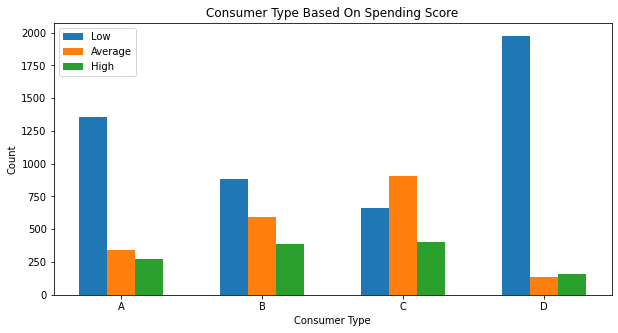

In [30]:
x = np.arange(len(spend_based.columns))
width = 0.2

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(spend_based)):
    ax.bar(x+(i*width),spend_based.loc[spend_based.index[i]],width=width, label=spend_based.index[i])

ax.set_xticks(x+((len(spend_based)/2-0.5)*width))
ax.set_xticklabels(spend_based.columns)

plt.title('Consumer Type Based On Spending Score')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',frameon=True)
plt.show()

In [31]:
# Customer Type Based On Family Size

famsize_based = pd.DataFrame(df.groupby('Segmentation')['Family_Size'].agg(pd.Series.mode))
famsize_based

,Family_Size
Segmentation,
A,2.0
B,2.0
C,2.0
D,4.0


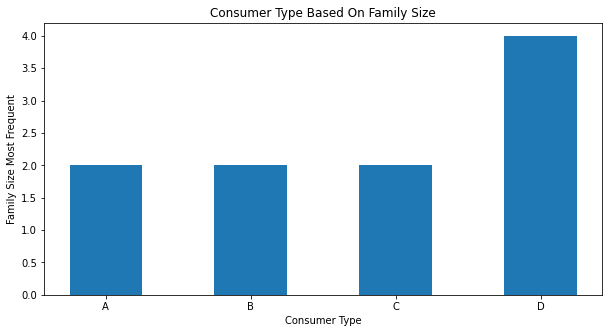

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(famsize_based.index,famsize_based['Family_Size'],width=0.5)

plt.title('Consumer Type Based On Family Size')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Family Size Most Frequent')
plt.show()


In [33]:
# Customer Type Based On Var 1

var_based = pd.pivot_table(df,values='ID',index=['Var_1'],columns=['Segmentation'],aggfunc=np.count_nonzero)
var_based

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,31,28,26,50
Cat_2,85,107,101,137
Cat_3,225,186,155,261
Cat_4,336,234,112,415
Cat_5,19,20,18,29
Cat_6,1224,1240,1511,1312
Cat_7,52,43,47,64


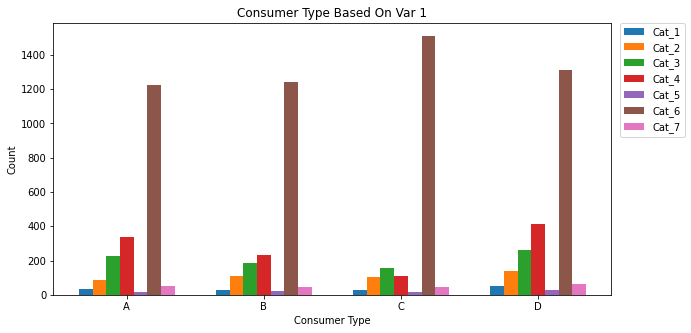

In [34]:
x = np.arange(len(var_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(var_based)):
    ax.bar(x+(i*width),var_based.loc[var_based.index[i]],width=width, label=var_based.index[i])

ax.set_xticks(x+((len(var_based)/2-0.5)*width))
ax.set_xticklabels(var_based.columns)

plt.title('Consumer Type Based On Var 1')
ax.set_xlabel('Consumer Type')
ax.set_ylabel('Count')

plt.legend(loc='best',bbox_to_anchor=(0.84,0.42,0.3,0.6),frameon=True)
plt.show()

In [43]:
cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df,columns=cat)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


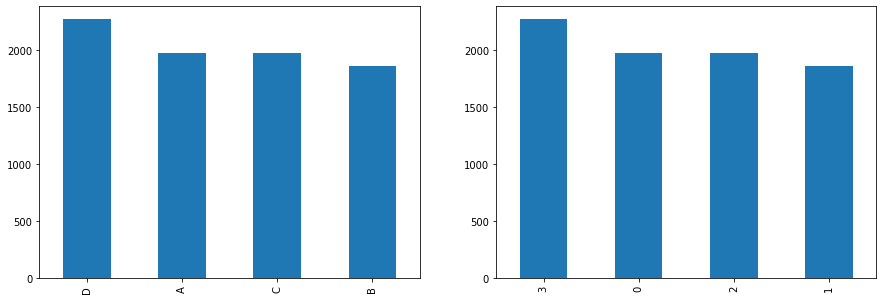

In [46]:
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
train['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

In [47]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(f"The accuracy score for Random Forest is {(accuracy_score(y_test,y_pred_rf)*100).round(2)}")

The accuracy score for Random Forest is 48.88


In [51]:
# for Random forest
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)
print(f"10-fold cross validation average accuracy: {scores.mean().round(3)}")

10-fold cross validation average accuracy: 0.482


In [52]:
# max score
print(f"10-fold cross validation max accuracy: {(scores.max() *100).round(2)} %")

10-fold cross validation max accuracy: 51.3 %


In [53]:
# shape
print(train.shape)
print(test.shape)

(8068, 11)
(2627, 11)


In [54]:
test.fillna(method = 'ffill', inplace = True)

In [55]:
test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [56]:
cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies_test = pd.get_dummies(test,columns=cat)
print(df_dummies_test.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [57]:
le = LabelEncoder()
df_dummies_test['Segmentation_label'] = le.fit_transform(df_dummies_test['Segmentation'])
df_dummies_test['Segmentation_label']

0       1
1       0
2       0
3       1
4       0
       ..
2622    1
2623    0
2624    2
2625    2
2626    0
Name: Segmentation_label, Length: 2627, dtype: int64

In [58]:
X_test_new = df_dummies_test.drop(['Segmentation','ID','Segmentation_label'],axis = 1)
y_test_new = df_dummies_test['Segmentation_label']
y_pred_new = rf.predict(X_test_new)
y_new = pd.DataFrame({'Actual':y_test_new,'Predicted': y_pred_new })
y_new

,Actual,Predicted
0,1,1
1,0,2
2,0,0
3,1,2
4,0,3
...,...,...
2622,1,3
2623,0,1
2624,2,0
2625,2,2


In [59]:
y_new['outcome'] = np.where( y_new['Actual'] == y_new['Predicted'] , 'Correct', 'Incorrect')


In [60]:
y_new

,Actual,Predicted,outcome
0,1,1,Correct
1,0,2,Incorrect
2,0,0,Correct
3,1,2,Incorrect
4,0,3,Incorrect
...,...,...,...
2622,1,3,Incorrect
2623,0,1,Incorrect
2624,2,0,Incorrect
2625,2,2,Correct
